In [43]:
import sys
sys.path.append("../../")
import warnings
warnings.simplefilter(action="ignore")
import numpy as np
import seaborn as sns
import pandas as pd
import polars as pl
import plotly.express as px
from functions.eda import *
from functions.cat_eda import *
from functions.num_eda import *

In [44]:
data=pl.read_csv("Customer-Churn.csv").drop("customerID")
data.head()

gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
str,i64,str,str,i64,str,str,str,str,str,str,str,str,str,str,str,str,f64,f64,str
"""Female""",0,"""Yes""","""No""",1,"""No""","""No phone service""","""DSL""","""No""","""Yes""","""No""","""No""","""No""","""No""","""Month-to-month""","""Yes""","""Electronic check""",29.85,29.85,"""No"""
"""Male""",0,"""No""","""No""",34,"""Yes""","""No""","""DSL""","""Yes""","""No""","""Yes""","""No""","""No""","""No""","""One year""","""No""","""Mailed check""",56.95,1889.5,"""No"""
"""Male""",0,"""No""","""No""",2,"""Yes""","""No""","""DSL""","""Yes""","""Yes""","""No""","""No""","""No""","""No""","""Month-to-month""","""Yes""","""Mailed check""",53.85,108.15,"""Yes"""
"""Male""",0,"""No""","""No""",45,"""No""","""No phone service""","""DSL""","""Yes""","""No""","""Yes""","""Yes""","""No""","""No""","""One year""","""No""","""Bank transfer (automatic)""",42.3,1840.75,"""No"""
"""Female""",0,"""No""","""No""",2,"""Yes""","""No""","""Fiber optic""","""No""","""No""","""No""","""No""","""No""","""No""","""Month-to-month""","""Yes""","""Electronic check""",70.7,151.65,"""Yes"""


Unique observations after removing customer ID

In [45]:
data=data.unique()
data.shape

(7021, 20)

Casting yes as 1 and No as 0

In [46]:
data=data.with_columns(data["Churn"].map_elements(lambda x : x=="Yes").cast(pl.Float64))

## PreSplitting

In [47]:
from sklearn.model_selection import train_test_split
train_data,test_data= train_test_split(data,test_size=0.3,random_state=42,stratify=data[["Churn"]])  # Holdout set
train_data.write_csv("train_Churn_data.csv")
train_data.shape,test_data.shape

((4914, 20), (2107, 20))

In [48]:
train_data.describe()

statistic,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
str,str,f64,str,str,f64,str,str,str,str,str,str,str,str,str,str,str,str,f64,f64,f64
"""count""","""4914""",4914.0,"""4914""","""4914""",4914.0,"""4914""","""4914""","""4914""","""4914""","""4914""","""4914""","""4914""","""4914""","""4914""","""4914""","""4914""","""4914""",4914.0,4905.0,4914.0
"""null_count""","""0""",0.0,"""0""","""0""",0.0,"""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""",0.0,9.0,0.0
"""mean""",null,0.165446,null,null,32.769434,null,null,null,null,null,null,null,null,null,null,null,null,64.688156,2308.402375,0.26455
"""std""",null,0.37162,null,null,24.490658,null,null,null,null,null,null,null,null,null,null,null,null,30.360767,2274.996595,0.441138
"""min""","""Female""",0.0,"""No""","""No""",0.0,"""No""","""No""","""DSL""","""No""","""No""","""No""","""No""","""No""","""No""","""Month-to-month""","""No""","""Bank transfer (automatic)""",18.25,18.8,0.0
"""25%""",null,0.0,null,null,9.0,null,null,null,null,null,null,null,null,null,null,null,null,34.7,415.55,0.0
"""50%""",null,0.0,null,null,30.0,null,null,null,null,null,null,null,null,null,null,null,null,70.4,1414.2,0.0
"""75%""",null,0.0,null,null,56.0,null,null,null,null,null,null,null,null,null,null,null,null,90.1,3848.8,1.0
"""max""","""Male""",1.0,"""Yes""","""Yes""",72.0,"""Yes""","""Yes""","""No""","""Yes""","""Yes""","""Yes""","""Yes""","""Yes""","""Yes""","""Two year""","""Yes""","""Mailed check""",118.75,8684.8,1.0


# Dealing with null values

In [49]:
train_data.filter((train_data["TotalCharges"].is_null()))

gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
str,i64,str,str,i64,str,str,str,str,str,str,str,str,str,str,str,str,f64,f64,f64
"""Female""",0,"""Yes""","""Yes""",0,"""No""","""No phone service""","""DSL""","""Yes""","""Yes""","""Yes""","""Yes""","""Yes""","""No""","""Two year""","""No""","""Credit card (automatic)""",56.05,null,0.0
"""Female""",0,"""Yes""","""Yes""",0,"""Yes""","""No""","""DSL""","""Yes""","""Yes""","""Yes""","""No""","""Yes""","""Yes""","""Two year""","""No""","""Mailed check""",80.85,null,0.0
"""Male""",0,"""No""","""Yes""",0,"""Yes""","""No""","""No""","""No internet service""","""No internet service""","""No internet service""","""No internet service""","""No internet service""","""No internet service""","""Two year""","""No""","""Mailed check""",20.25,null,0.0
"""Male""",0,"""Yes""","""Yes""",0,"""Yes""","""Yes""","""No""","""No internet service""","""No internet service""","""No internet service""","""No internet service""","""No internet service""","""No internet service""","""Two year""","""No""","""Mailed check""",25.75,null,0.0
"""Male""",0,"""Yes""","""Yes""",0,"""Yes""","""No""","""No""","""No internet service""","""No internet service""","""No internet service""","""No internet service""","""No internet service""","""No internet service""","""One year""","""Yes""","""Mailed check""",19.7,null,0.0
"""Male""",0,"""No""","""Yes""",0,"""Yes""","""Yes""","""DSL""","""Yes""","""Yes""","""No""","""Yes""","""No""","""No""","""Two year""","""Yes""","""Bank transfer (automatic)""",61.9,null,0.0
"""Female""",0,"""Yes""","""Yes""",0,"""Yes""","""No""","""No""","""No internet service""","""No internet service""","""No internet service""","""No internet service""","""No internet service""","""No internet service""","""Two year""","""No""","""Mailed check""",20.0,null,0.0
"""Female""",0,"""Yes""","""Yes""",0,"""Yes""","""Yes""","""DSL""","""No""","""Yes""","""Yes""","""Yes""","""Yes""","""No""","""Two year""","""No""","""Mailed check""",73.35,null,0.0
"""Male""",0,"""Yes""","""Yes""",0,"""Yes""","""No""","""No""","""No internet service""","""No internet service""","""No internet service""","""No internet service""","""No internet service""","""No internet service""","""Two year""","""No""","""Mailed check""",19.85,null,0.0


only 4 observations dropping them ratherthan imputing.Model cant learn with 4 observations during cv

In [50]:
train_data=train_data.filter(~(train_data["TotalCharges"].is_null()))
test_data=test_data.filter(~(test_data["TotalCharges"].is_null()))

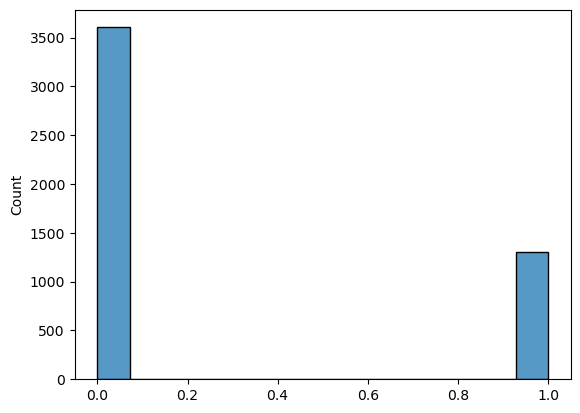

In [51]:
sns.histplot(train_data["Churn"])
plt.show()

# Imbalanced dataSet

In [52]:
cat_cols=[col for col in train_data.columns if train_data[col].dtype== pl.String]
num_cols=[col for col in train_data.drop("Churn").columns if train_data[col].dtype!= pl.String]

# Categorical EDA

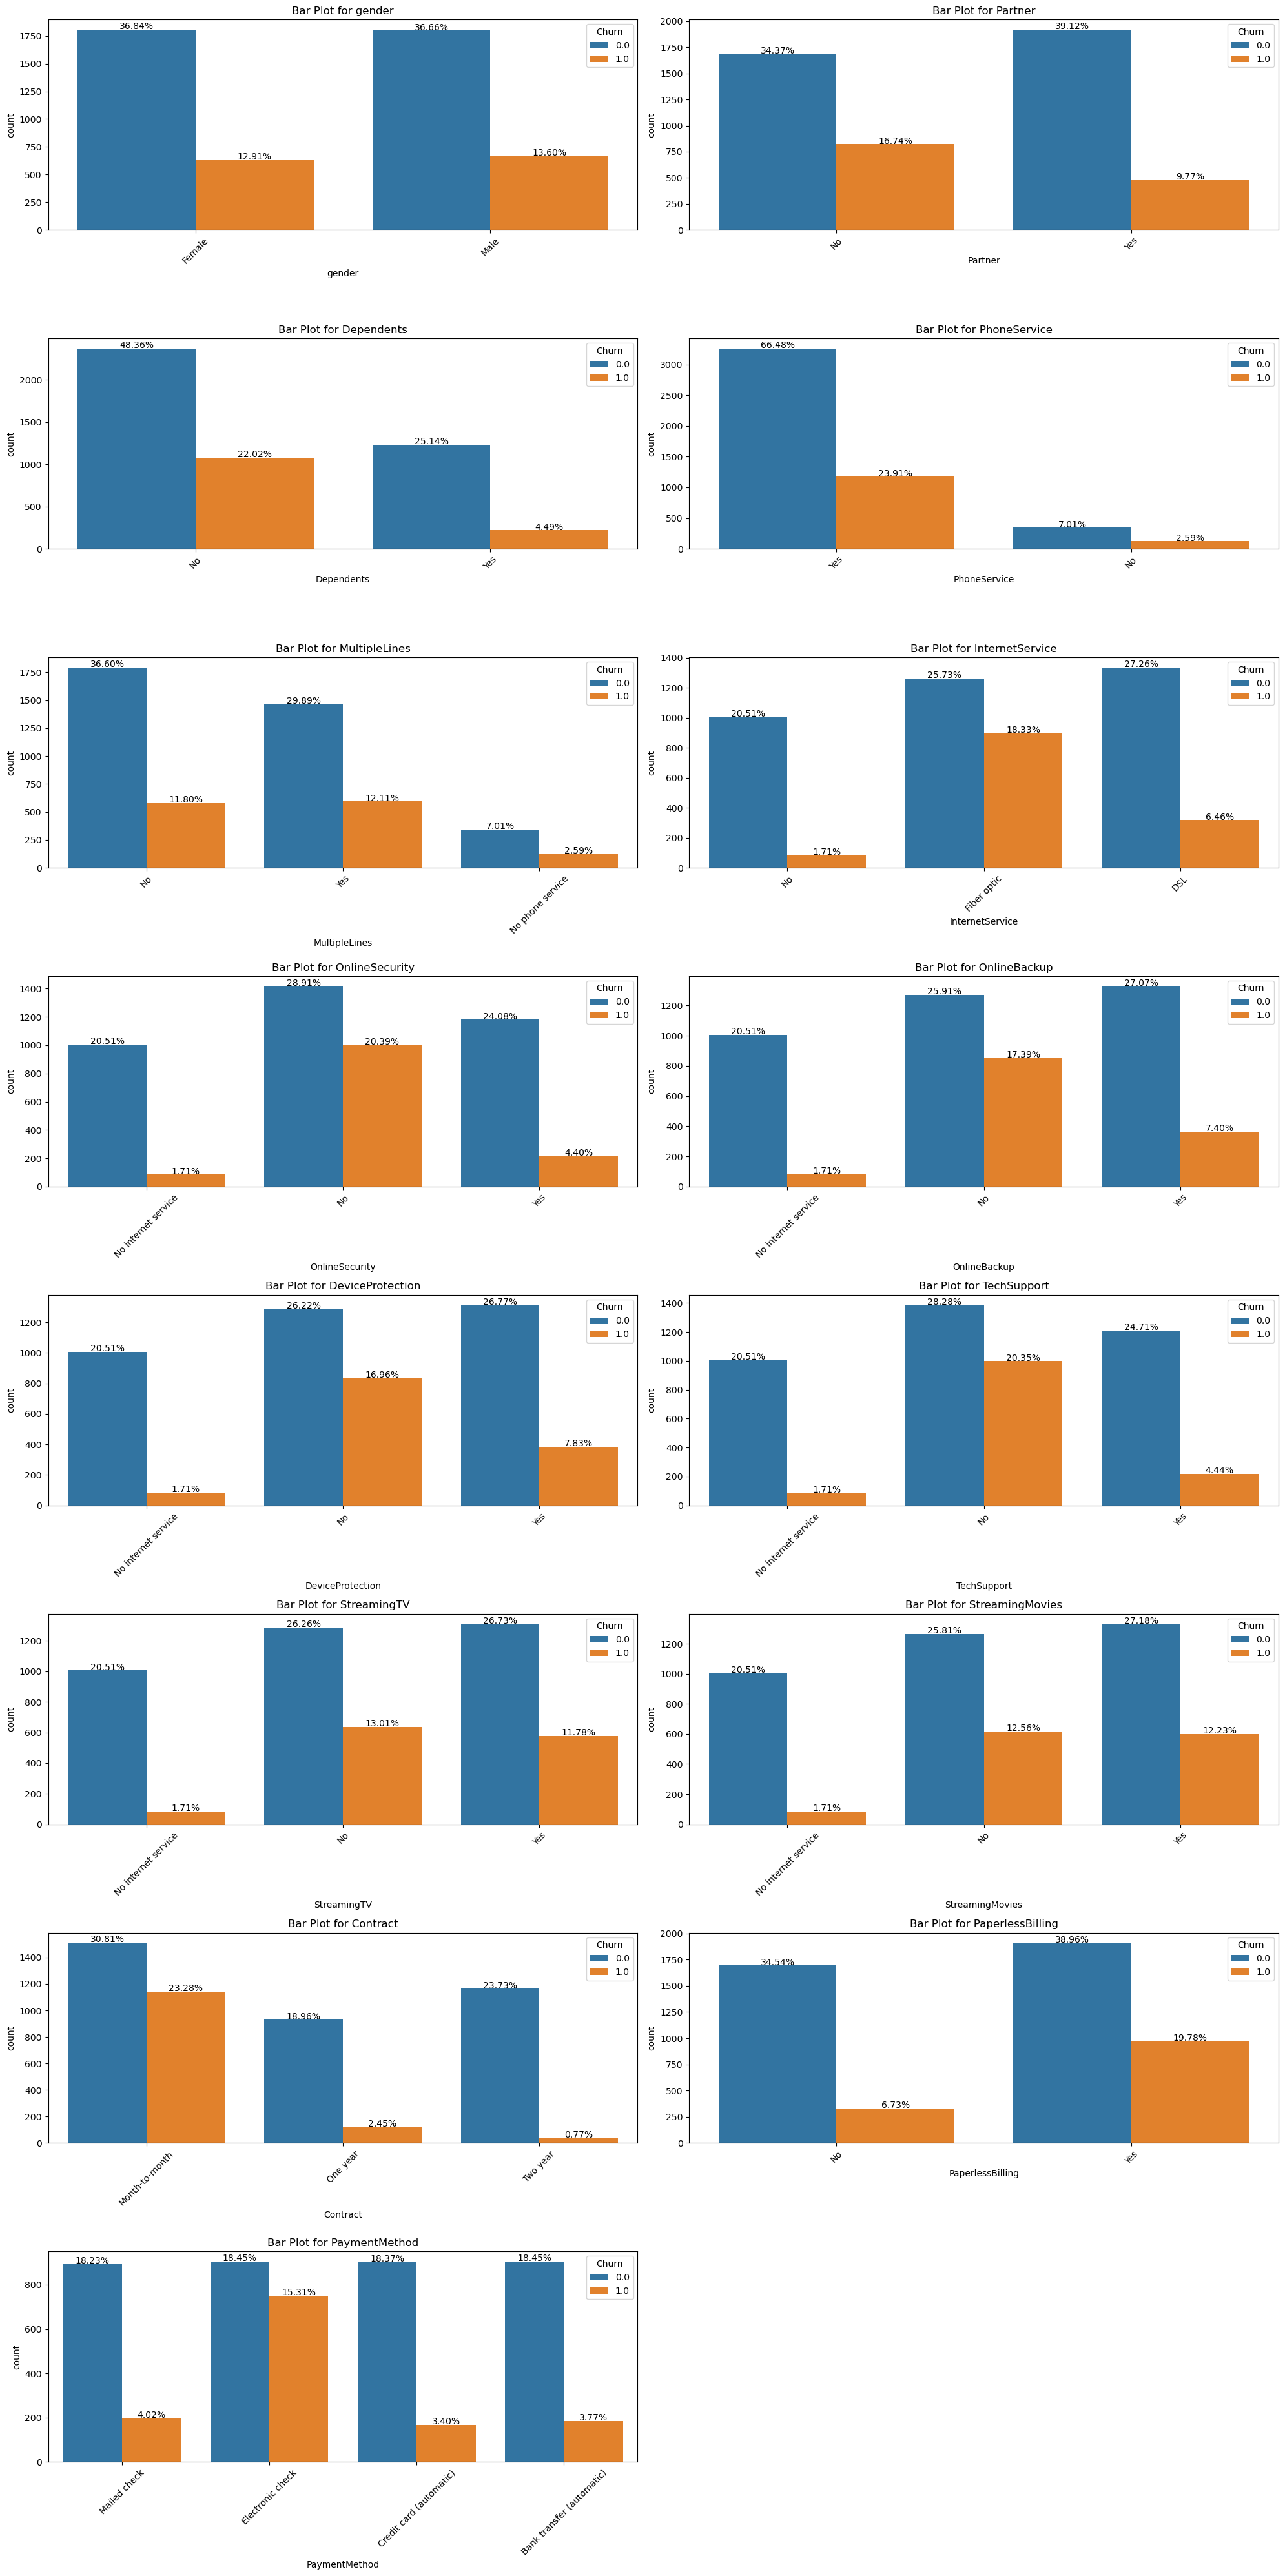

In [53]:
categorical_hist_plot(train_data.to_pandas(),cat_cols,"Churn")

More likely to churn
- Singles
- Customers with No (dependents,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport)
- FiberOptic Consumers
- Month-to-Month contracts
- Paperless billing
- Electronic Check payments

In [54]:
perform_non_normal_kruskal_hypothesis(train_data,cat_cols,"Churn")

Kruskal-Wallis H-statistic: 0.7841390400930707 P-value: 0.3758782558590251
There is no significant difference in Churn between different gender categories.

Kruskal-Wallis H-statistic: 102.63921414170545 P-value: 4.020947391423293e-24
There is a significant difference in Churn between different Partner categories.

Kruskal-Wallis H-statistic: 136.81098940010975 P-value: 1.3262710668097495e-31
There is a significant difference in Churn between different Dependents categories.

Kruskal-Wallis H-statistic: 0.05667091604282521 P-value: 0.81183724217001
There is no significant difference in Churn between different PhoneService categories.

Kruskal-Wallis H-statistic: 11.245386411658206 P-value: 0.0036148923380186636
There is a significant difference in Churn between different MultipleLines categories.

Kruskal-Wallis H-statistic: 496.2038600907439 P-value: 1.781151380172664e-108
There is a significant difference in Churn between different InternetService categories.

Kruskal-Wallis H-statis

# Similar results from hypothesis tests except : it shows few more features are significant:
- Streaming Tv
- Streaming Movies

In [55]:
train_data=train_data.drop("gender","PhoneService")
test_data=test_data.drop("gender","PhoneService")
cat_cols.remove("gender")
cat_cols.remove("PhoneService")

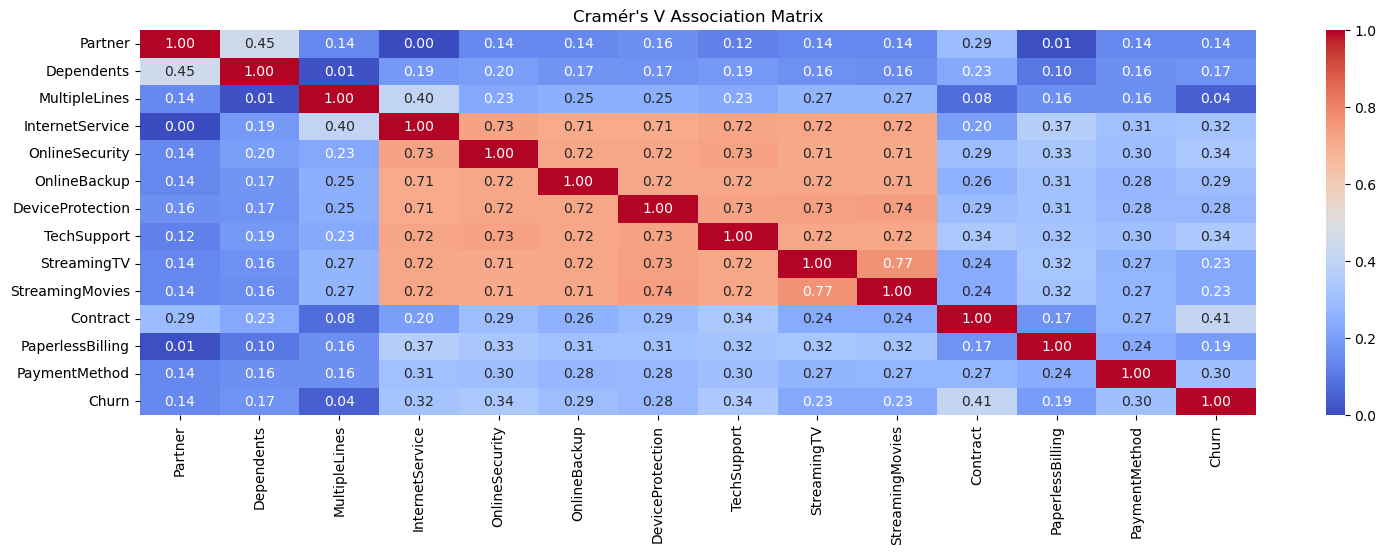

In [56]:
matrix = cramers_v_matrix(train_data,cat_cols+["Churn"])
plot_heatmap(matrix,cat_cols+["Churn"])

Seems many Associated features, we can deal with this in feature engineering

# Numerical EDA

## Univariate Analysis

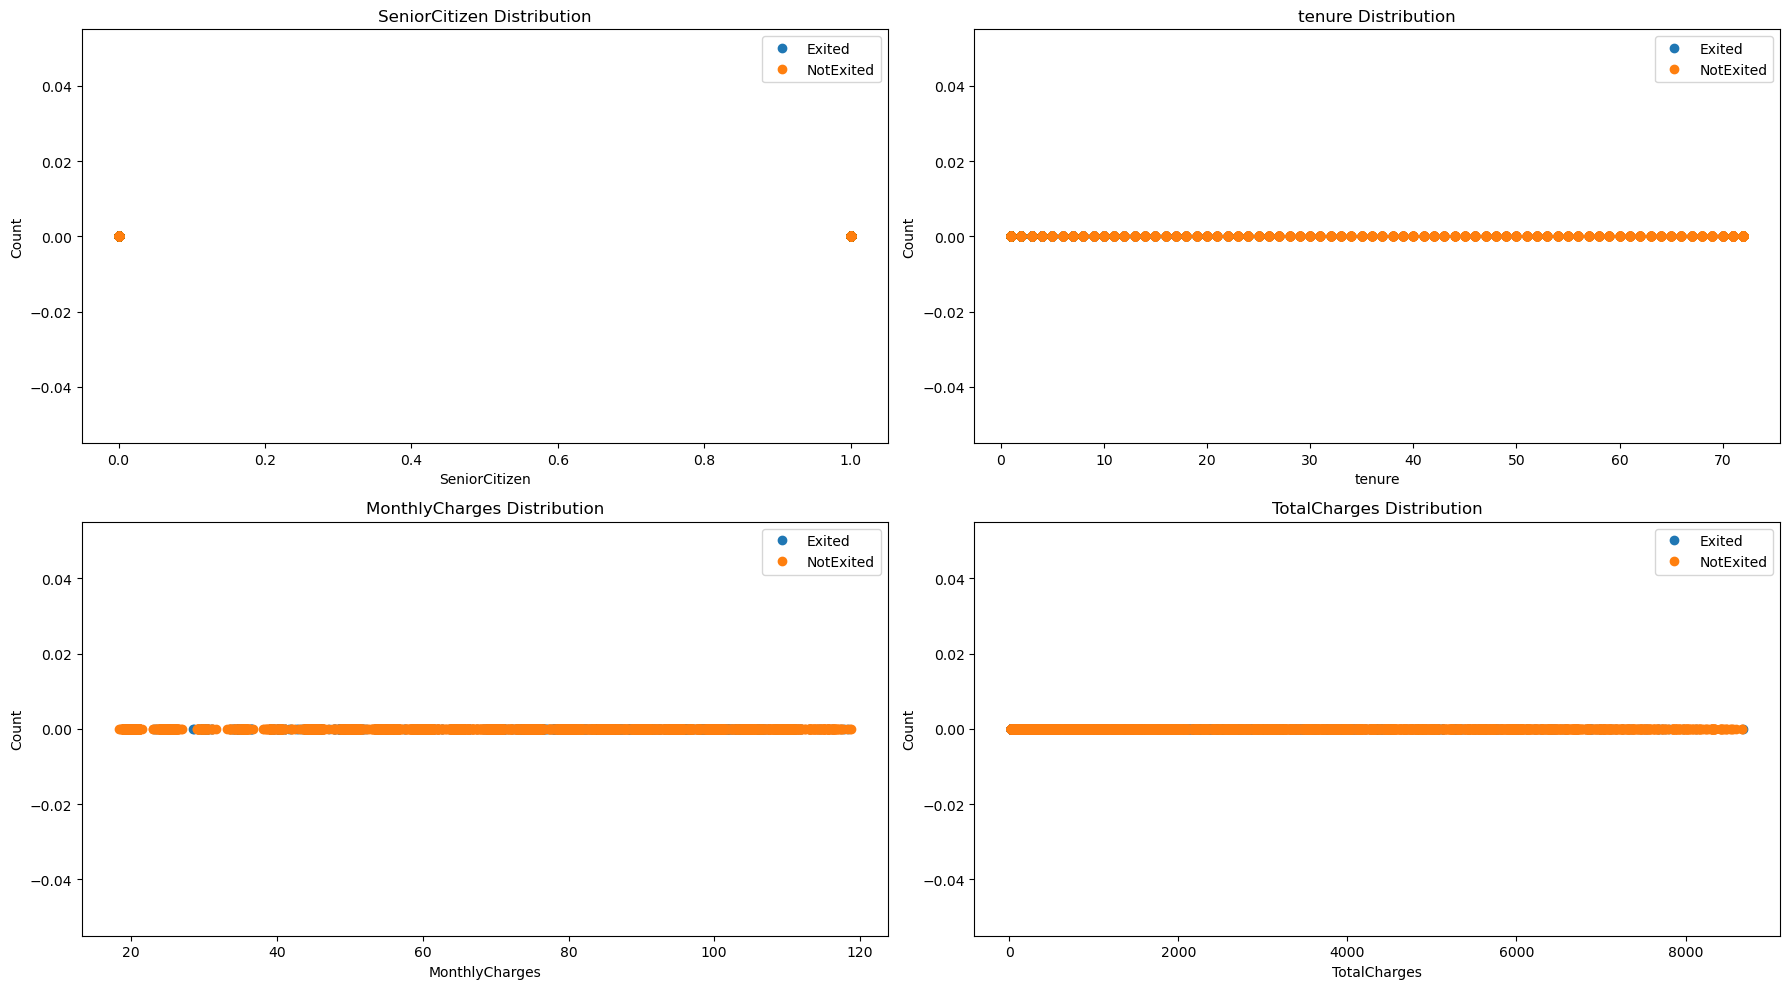

In [57]:
df_Churn = train_data.filter(train_data['Churn']==1)
df_notChurn = train_data.filter(train_data['Churn']==0)
univariavte_lineplots(df_Churn, df_notChurn, num_cols)

Data is not liner separable by single feature

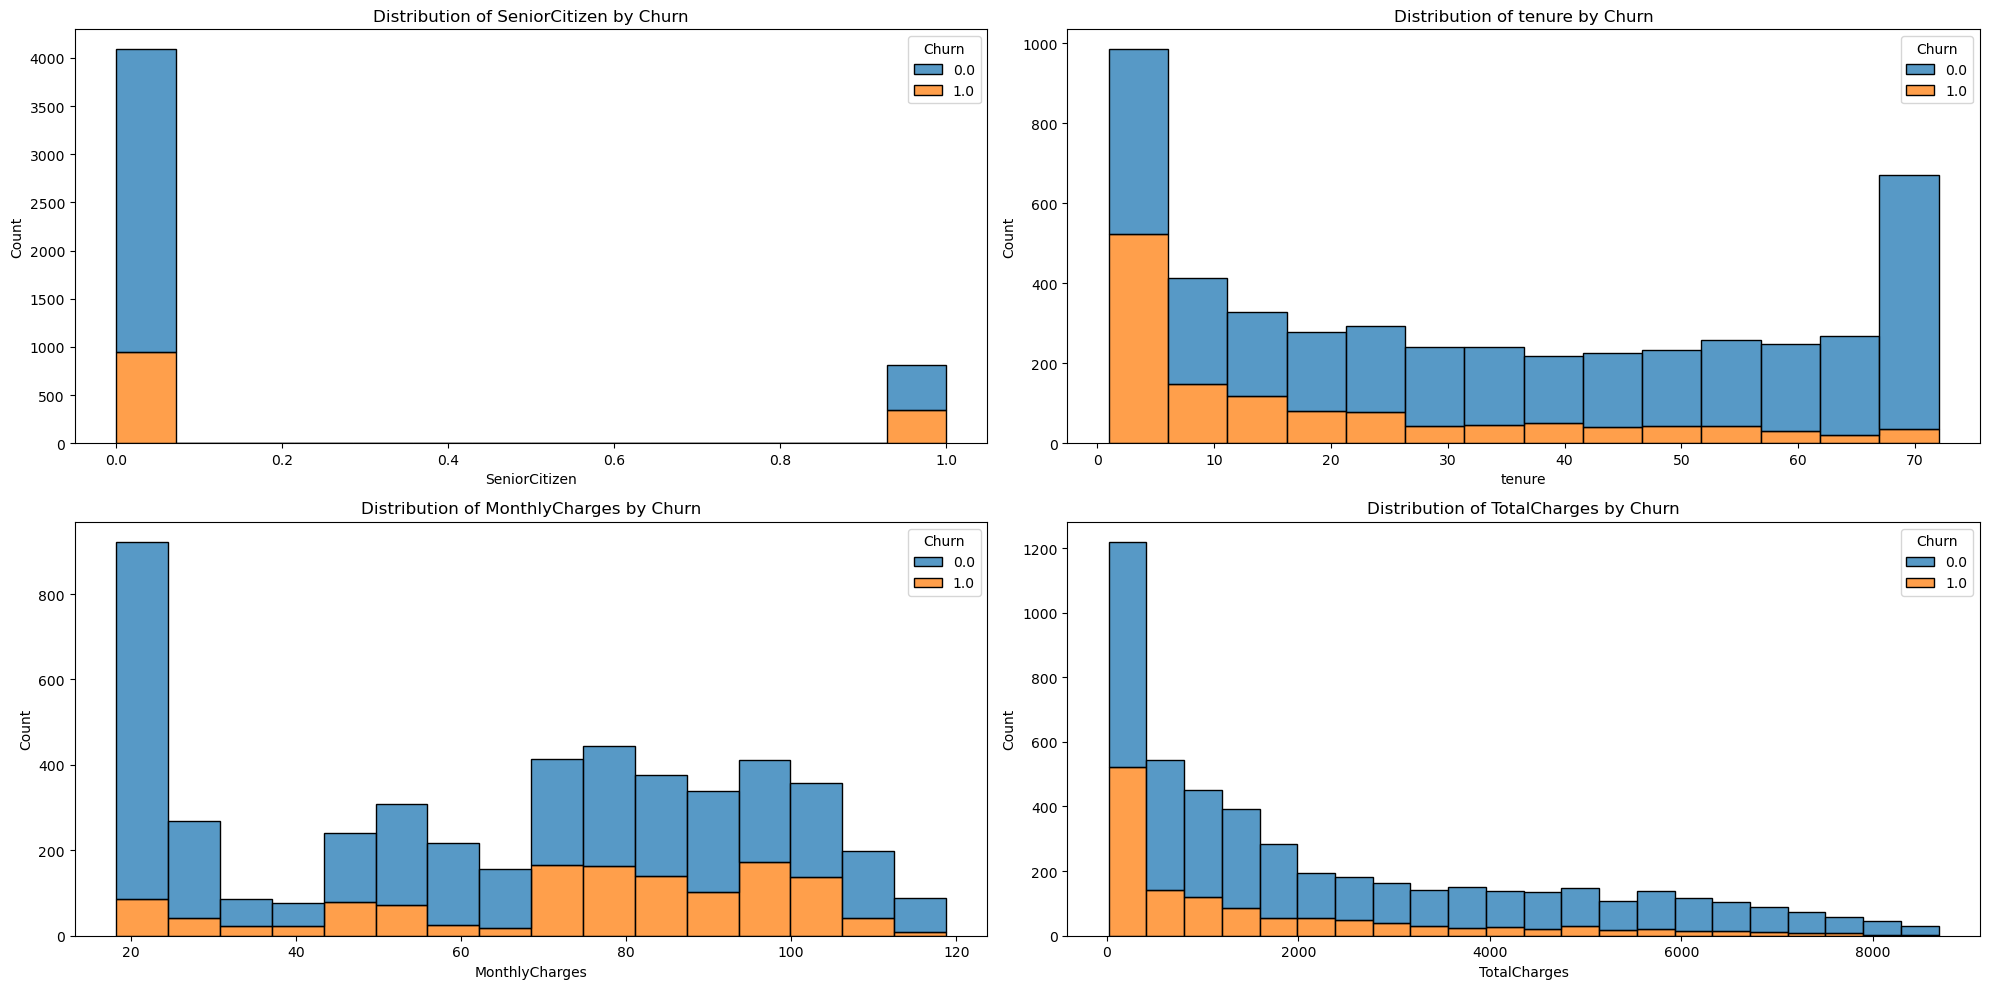

In [58]:
num_stack_plot(train_data,num_cols,"Churn")

## Bivariate Analysis

<Axes: >

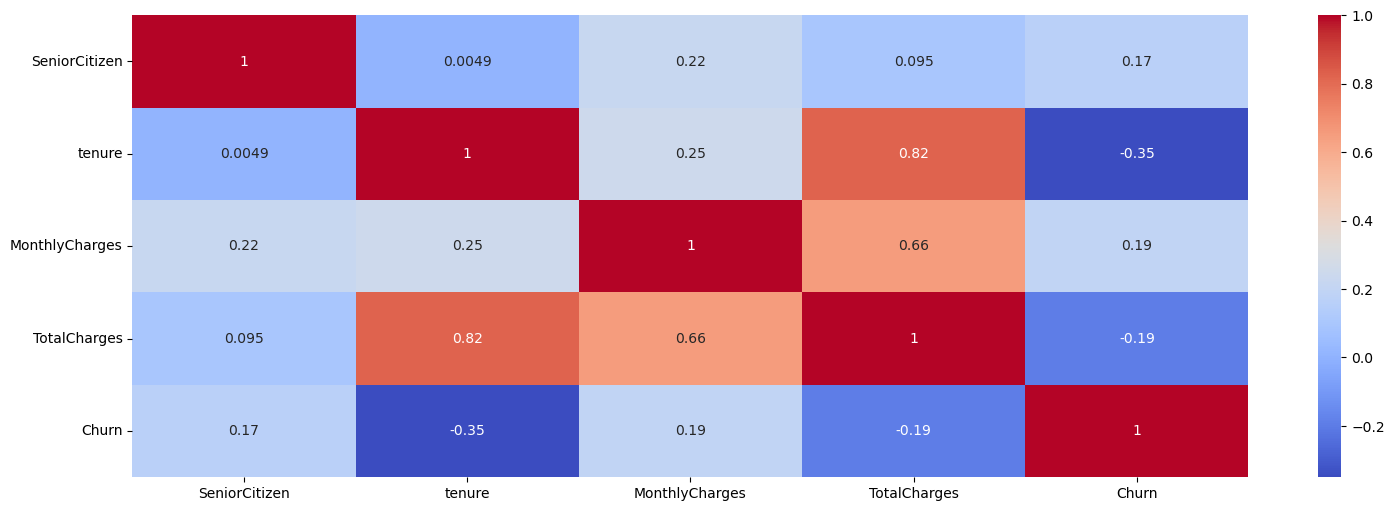

In [59]:
plt.figure(figsize=(18,6))
sns.heatmap(train_data[num_cols+["Churn"]].to_pandas().corr(),annot=True,cmap="coolwarm")

# Multivariate Analysis

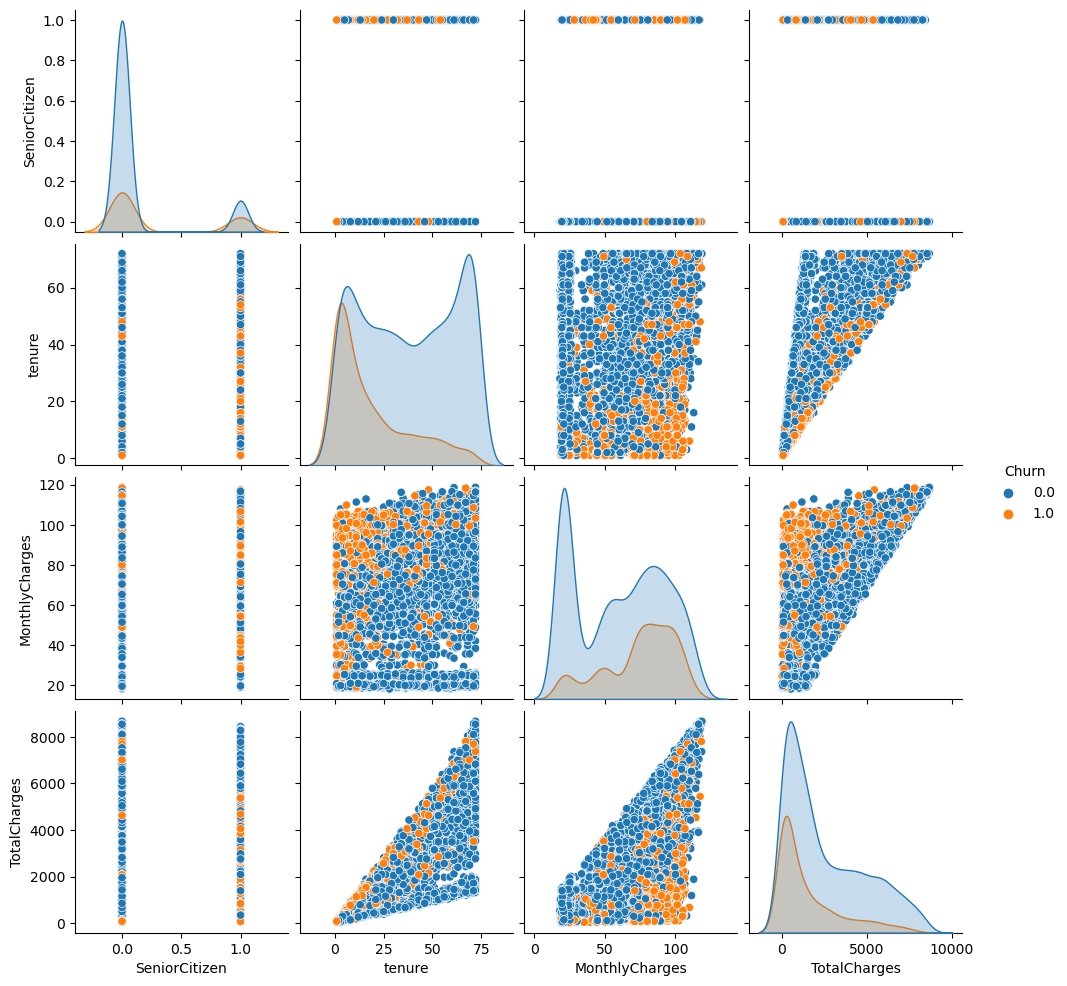

In [60]:
sns.pairplot(train_data[num_cols+["Churn"]].to_pandas(),hue='Churn')

In [61]:
train_data.write_csv("../Day2_Naive_Modeling/train_data.csv")
test_data.write_csv("../Day2_Naive_Modeling/test_data.csv")

Base model

In [62]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler,OneHotEncoder
 
cat_cols=[col for col in train_data.columns if train_data[col].dtype== pl.String]
num_cols=[col for col in train_data.drop("Churn").columns if train_data[col].dtype!= pl.String]

X_train=train_data.drop("Churn").to_pandas()
y_train=train_data["Churn"].to_pandas()
X_test=test_data.drop("Churn").to_pandas()
y_test=test_data["Churn"].to_pandas()

transformer = ColumnTransformer(
    [
        ("onehot", OneHotEncoder(handle_unknown="ignore",drop='first'), cat_cols),
        ("scaler", StandardScaler(), num_cols)
     ],
    remainder="passthrough",
)

pipe = Pipeline(
    [
        ("tranformer", transformer),
        ("classifier", LogisticRegression(penalty=None)),
    ]
)
pipe

Pipeline(steps=[('tranformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['Partner', 'Dependents',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod']),
                                                 ('scaler', StandardScaler(),
                                                  ['SeniorCitizen', 'tenure',
                                                   'MonthlyCharges',
                                                   'TotalCharges'])])),
                ('classifier', LogisticRegression(penalty=None))])

In [35]:
from sklearn.model_selection import cross_validate,StratifiedKFold
skf = StratifiedKFold(n_splits=10,shuffle=True,random_state=42)
cv_results = cross_validate(pipe, X_train,y_train, cv=skf, scoring=['recall','roc_auc'],n_jobs=-1,return_train_score=True,error_score="raise")
print(f'Mean Train roc auc Score: {cv_results["train_roc_auc"].mean()}')
print(f'Standard Deviation of Train roc auc Scores: {cv_results["train_roc_auc"].std()}')
print(f'Mean Train recall Score: {cv_results["train_recall"].mean()}')
print(f'Standard Deviation of Train recall Scores: {cv_results["train_recall"].std()}\n')

print(f'Mean Test roc auc Score: {cv_results["test_roc_auc"].mean()}')
print(f'Standard Deviation of Test roc auc Scores: {cv_results["test_roc_auc"].std()}')
print(f'Mean Test recall Score: {cv_results["test_recall"].mean()}')
print(f'Standard Deviation of Test recall Scores: {cv_results["test_recall"].std()}')

Mean Train roc auc Score: 0.8467176811707731
Standard Deviation of Train roc auc Scores: 0.0019128587906227482
Mean Train recall Score: 0.5491452991452992
Standard Deviation of Train recall Scores: 0.006623242313182695

Mean Test roc auc Score: 0.8426062457087389
Standard Deviation of Test roc auc Scores: 0.01770969134329534
Mean Test recall Score: 0.5484615384615384
Standard Deviation of Test recall Scores: 0.04255869598037861


In [36]:
from sklearn.metrics import accuracy_score,classification_report,roc_curve,roc_auc_score
from sklearn.model_selection import cross_val_predict
predictions= cross_val_predict(pipe,X_test,y_test,cv=skf)
print("logistic regression accuracy :",accuracy_score(y_true=y_test,y_pred=predictions))
print("auc roc",roc_auc_score(y_test,predictions))
print(classification_report(y_test,predictions))

logistic regression accuracy : 0.8076009501187649
auc roc 0.7272428894177464
              precision    recall  f1-score   support

         0.0       0.85      0.90      0.87      1548
         1.0       0.66      0.56      0.60       557

    accuracy                           0.81      2105
   macro avg       0.76      0.73      0.74      2105
weighted avg       0.80      0.81      0.80      2105



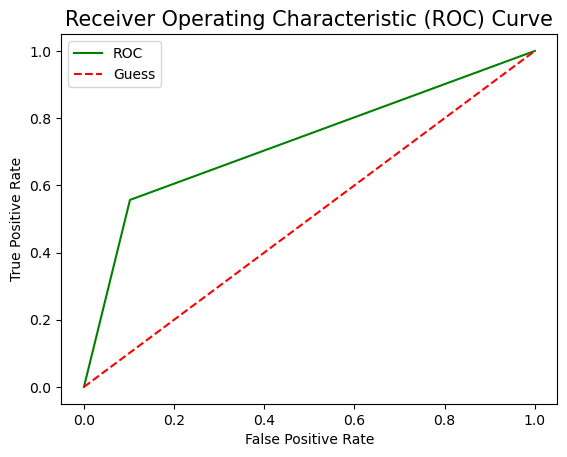

In [37]:
def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positve rate (fpr) and 
    true postive rate (tpr) of a classifier.
    """
    # Plot ROC curve
    plt.plot(fpr, tpr, color='green', label='ROC')
    
    # Plot line with no predictive power (baseline)
    plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Guess')
    
    # Customize the plot
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=15)
    plt.legend()
    plt.show()
fpr, tpr, thresholds=roc_curve(y_test,predictions)
plot_roc_curve(fpr, tpr)

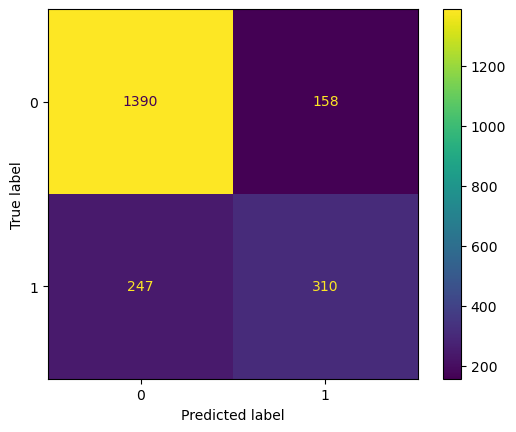

In [38]:
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix
fig=ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,predictions))
fig.plot()

In [39]:
from sklearn.metrics import roc_auc_score,f1_score,accuracy_score,recall_score
# Evaluation
roc_auc = roc_auc_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
accuracy = accuracy_score(y_test, predictions)
recall = recall_score(y_test,predictions)
print(f"ROC AUC: {roc_auc:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Recall score: {recall:.2f}")
print(f"Accuracy: {accuracy:.2f}")

ROC AUC: 0.73
F1 Score: 0.60
Recall score: 0.56
Accuracy: 0.81


56% churners are identified with 73% AUC